#12b Albedo Derivation from MODIS Data

This notebook forms part of a series on computational optical radiometry.  The notebooks can be downloaded from [Github](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi). These notebooks are constantly revised and updated, please revisit from time to time.  


[<img src="https://zenodo.org/badge/doi/10.5281/zenodo.9910.png"   align="left"/>](http://dx.doi.org/10.5281/zenodo.9910)


The date of this document and module versions used in this document are given at the end of the file.  
Feedback is appreciated: neliswillers at gmail dot com.

This notebook is set up for conversion to \LaTeX{} using the ipnb2tex script available at  [ipynb2tex](https://github.com/NelisW/ipynb2tex).  The PDF output of this conversion is available in the [computational radiometry repository](https://github.com/NelisW/ComputationalRadiometry/12b-AlbedoDerivation.pdf).

## Overview

This notebook demonstrates the use of Pandas to extract information from MODIS data.  The objective here is to determine the spectral albedo of an area in the visual and infrared spectral bands.  The data acquisition is done manually and this notebook focuses only on the analysis.  The MODIS data provide information in the visual, near infrared and thermal infrared bands, but with a gap from 3 $\mu$m to 10 $\mu$m - you have to consult other sources for this information.

The albedo calculated here is based on a multi-year dataset of a single site;  over a 7 km by 7 km region at the test site. The albedo is averaged over all the years for the twelve months of the year.  A picture of the test site is shown in Figure~\ref{fig:picturetestsite-0}.

In [1]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

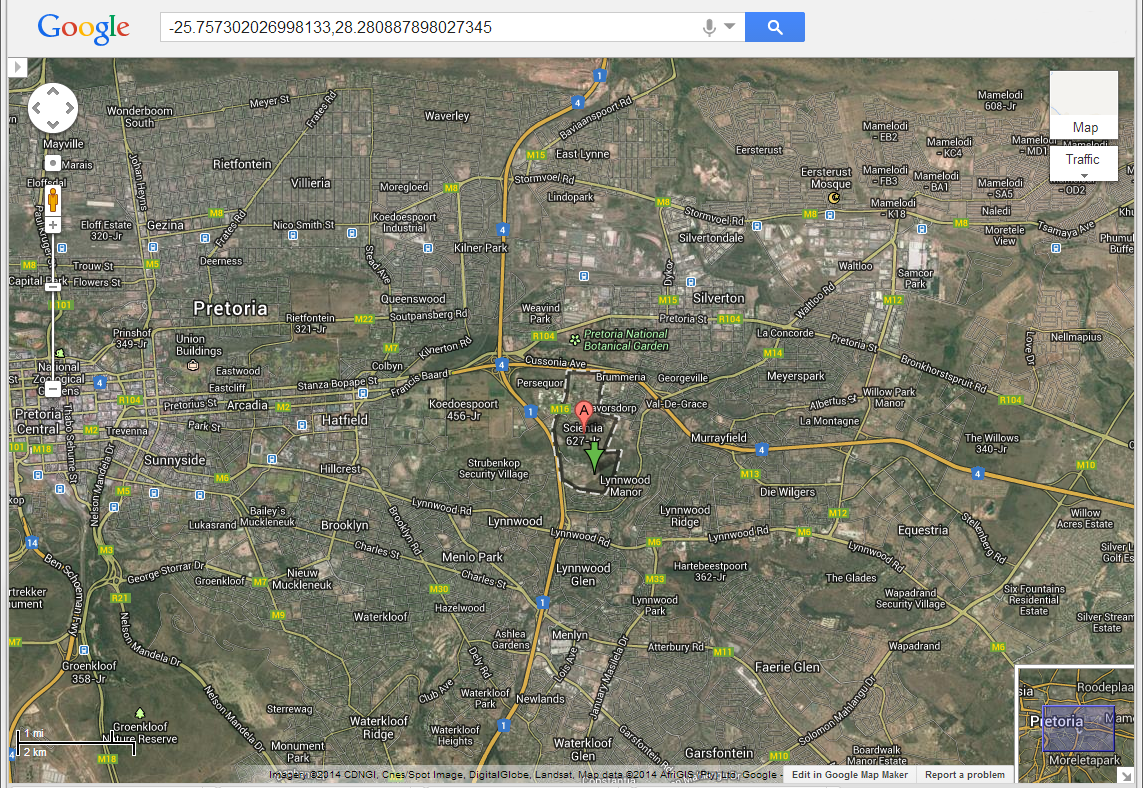

In [2]:
testsite = 'Pretoria'
display(Image(filename='./AlbedoData/SREFMOD09A1/locationMap.png'.format(testsite)))

##MODIS Reference information


Reference to the MODIS data source:  
"Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC). 2012. MODIS subsetted land products, Collection 5. Available on-line [http://daac.ornl.gov/MODIS/modis.html] from ORNL DAAC, Oak Ridge, Tennessee, U.S.A."

The data for this investigation was obtained from MODIS at 
<http://daac.ornl.gov/cgi-bin/MODIS/GLBVIZ_1_Glb/modis_subset_order_global_col5.pl>. Obtaining data from this site is relatively easy:  

1. Select the region by coordinates.  
2. Select the data product. In this case request the MOD9A1 and  MOD11A2 data products.
3. Specify the ground footprint required.  
4. Select the dates required.  
5. Provide the email address where you will be informed that the data is ready.
6. Once the data are ready, you are informed by email.
7. Download at least the following two files: `MOD09A1.asc` and `MOD11A2.asc` in order to use this notebook.
8. Place the files in the `./AlbedoData/LSTMOD11A2/` and `./AlbedoData/SREFMOD09A1/` directories.
9. Create a Google Earth picture of the test site, name it `locationMap.png` and place it in the `./AlbedoData/SREFMOD09A1/` directory.
10. Run this notebook.

### Data Format
The data format of the downloadable ASCII file is as follows (from <http://daac.ornl.gov/MODIS/Land_Product_Subset_ASCII.html> ).
Each data row can have a variable number of samples, so when reading the data file you must know the number of samples on each line. This number of samples is described in the entry for column 4 in the table below.  
	<table border="1" CELLSPACING="1" CELLPADDING="4">
		<tr>
			<td WIDTH="9%" VALIGN="TOP" BGCOLOR="#cccccc"><b>
			<p ALIGN="CENTER">Column Number</b></td>
			<td WIDTH="31%" VALIGN="MIDDLE" BGCOLOR="#cccccc"><b>
			<p ALIGN="CENTER">Column Description</b></td>
			<td WIDTH="60%" VALIGN="MIDDLE" BGCOLOR="#cccccc"><b>
			<p ALIGN="CENTER">Example Values</b></td>
		</tr>
		<tr>
			<td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">1</td>
			<td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">Unique row identifier</td>
			<td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">
			MOD15A2.A2000057.h12v03.004.2002357024124.FparExtra_QC<p>
			MOD15A2.A2000057.h12v03.004.2002357024124.Lai_1km</td>
		</tr>
		<tr>
			<td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">2</td>
			<td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">MODIS Land Product 
			Code</td>
			<td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">MOD15A2</td>
		</tr>
		<tr>
			<td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">3</td>
			<td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">MODIS Acquisition 
			Date [ A (YYYYDDD) ]</td>
			<td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">A2000057</td>
		</tr>
		<tr>
			<td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">4</td>
			<td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">User selected center 
			point coordinates and specified width (Samp) and height (Line) of 
			bounding rectangle in pixels. Width x height denotes number of 
			Product values starting in Column 7. (e.g.,  7 x 7 = 49)</td>
			<td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">
			Lat55.879620Lon-98.480810Samp7Line7</td>
		</tr>
		<tr>
			<td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">5</td>
			<td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">MODIS Processing Date 
			(YYYYDDDHHMMSS)</td>
			<td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">2002357024124</td>
		</tr>
		<tr>
			<td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">6</td>
			<td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">Product Scientific 
			Data Set (Band): Indicates type of values to follow. Specific values 
			vary by Product. Data quality information are interleaved.</td>
			<td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">MOD15A2: FparExtra_QC,  
			FparLai_QC,  Fpar_1km<p>MOD17A2: Gpp_1km,  PsnNet_1km,  Psn_QC_1km</td>
		</tr>
		<tr>
			<td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">7 to N</td>
			<td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">Data values of type 
			as specified. Number of data columns as given in Column 4.<p>
			Definition of QC component values vary by Scientific Data Set.</td>
			<td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">QC: 
			00100001, 01100001, 01100001,  ...<p>Measurement: 
			2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...to N</td>
		</tr>
	</table>








### MOD9A1

The Modis MOD9A1 product is documented at <https://lpdaac.usgs.gov/products/modis_products_table/MOD09A1>  
Of particular interest here is the reflectance in bands one to seven. For these bands it is evident that the reflectance is given by $\rho$=Val$\times$0.0001, where Val is the value in the data file.
Science Data Sets for MODIS Terra Surface Reflectance 8-Day L3 Global 500m SIN Grid V005 (MOD09A1):  

<table border="1" cellpadding="2" cellspacing="0" class="renderedtable"><tbody><tr class="bgdark"><th valign="top">
<p>Science Data Sets (HDF Layers) (13)</p>
</th>
<th valign="top">
<p>UNITS</p>
</th>
<th valign="top">
<p>BIT TYPE</p>
</th>
<th valign="top">
<p>FILL</p>
</th>
<th valign="top">
<p>VALID RANGE</p>
</th>
<th valign="top">
<p>MULTIPLY BY SCALE FACTOR</p>
</th>
</tr><tr class="bglight"><td valign="top">
				500m Surface Reflectance Band 1 (620--670 nm)</td>
<td valign="top">
				Reflectance</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				-28672</td>
<td valign="top">
				-100--16000</td>
<td valign="top">
				0.0001</td>
</tr><tr class="bgdark"><td valign="top">
				500m Surface Reflectance Band 2 (841--876 nm)</td>
<td valign="top">
				Reflectance</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				-28672</td>
<td valign="top">
				-100--16000</td>
<td valign="top">
				0.0001</td>
</tr><tr class="bglight"><td valign="top">
				500m Surface Reflectance Band 3 (459--479 nm)</td>
<td valign="top">
				Reflectance</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				-28672</td>
<td valign="top">
				-100--16000</td>
<td valign="top">
				0.0001</td>
</tr><tr class="bgdark"><td valign="top">
				500m Surface Reflectance Band 4 (545--565 nm)</td>
<td valign="top">
				Reflectance</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				-28672</td>
<td valign="top">
				-100--16000</td>
<td valign="top">
				0.0001</td>
</tr><tr class="bglight"><td valign="top">
				500m Surface Reflectance Band 5 (1230--1250 nm)</td>
<td valign="top">
				Reflectance</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				-28672</td>
<td valign="top">
				-100--16000</td>
<td valign="top">
				0.0001</td>
</tr><tr class="bgdark"><td valign="top">
				500m Surface Reflectance Band 6 (1628--1652 nm)</td>
<td valign="top">
				Reflectance</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				-28672</td>
<td valign="top">
				-100--16000</td>
<td valign="top">
				0.0001</td>
</tr><tr class="bglight"><td valign="top">
				500m Surface Reflectance Band 7 (2105--2155 nm)</td>
<td valign="top">
				Reflectance</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				-28672</td>
<td valign="top">
				-100--16000</td>
<td valign="top">
				0.0001</td>
</tr><tr class="bgdark"><td valign="top">
				500m Reflectance Band Quality</td>
<td valign="top">
				Bit Field</td>
<td valign="top">
				32-bit unsigned integer</td>
<td valign="top">
				4294967295</td>
<td valign="top">
				0--4294966531</td>
<td valign="top">
				na</td>
</tr><tr class="bglight"><td valign="top">
				Solar Zenith Angle</td>
<td valign="top">
				Degree</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				0</td>
<td valign="top">
				0--18000</td>
<td valign="top">
				0.01</td>
</tr><tr class="bgdark"><td valign="top">
				View Zenith Angle</td>
<td valign="top">
				Degree</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				0</td>
<td valign="top">
				0--18000</td>
<td valign="top">
				0.01</td>
</tr><tr class="bglight"><td valign="top">
				Relative Azimuth Angle</td>
<td valign="top">
				Degree</td>
<td valign="top">
				16-bit signed integer</td>
<td valign="top">
				0</td>
<td valign="top">
				-18000--18000</td>
<td valign="top">
				0.01</td>
</tr><tr class="bgdark"><td valign="top">
				500m State Flags</td>
<td valign="top">
				Bit field</td>
<td valign="top">
				16-bit unsigned integer</td>
<td valign="top">
				65535</td>
<td valign="top">
				0--57343</td>
<td valign="top">
				na</td>
</tr><tr class="bglight"><td valign="top">
				Day of Year</td>
<td valign="top">
				Julian day</td>
<td valign="top">
				16-bit unsigned integer</td>
<td valign="top">
				65535</td>
<td valign="top">
				1--366</td>
<td valign="top">
				na</td>
</tr></tbody></table>

### MOD11A2

The level-3 MODIS global Land Surface Temperature (LST) and Emissivity 8-day data are composed from the daily 1-kilometer LST product (MOD11A1) and stored on a 1-km Sinusoidal grid as the average values of clear-sky LSTs during an 8-day period.
MOD11A2 is comprised of daytime and nighttime LSTs, quality assessment, observation times, view angles, bits of clear sky days and nights, and emissivity values estimated in Bands 31 and 32 from land cover types.

The data types and required processing are described in the following table (from <https://lpdaac.usgs.gov/products/modis_products_table/MOD11A2>).
Of particular interest here is the Emis_31  (10.78--11.28 $\mu$m) and Emis_32 (11.77--12.27 $\mu$m) bands. For these bands it is evident that the emissivity is given by $\epsilon$=Val$\times$0.002+0.49, where Val is the value in the data file.
Science Data Sets for MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V005 (MOD11A2)  

<table border="1" cellpadding="2" cellspacing="0" class="renderedtable"><tbody><tr class="bgdark"><th valign="top">
<p>Science Data Sets (HDF Layers) (12)</p>
</th>
<th valign="top">
<p>UNITS</p>
</th>
<th valign="top">
<p>BIT TYPE</p>
</th>
<th valign="top">
<p>FILL</p>
</th>
<th valign="top">
<p>VALID RANGE</p>
</th>
<th valign="top">
<p>MULTIPLY BY SCALE FACTOR</p>
</th>
</tr><tr class="bglight"><td valign="top">
				LST_Day_1km: 8-Day daytime 1km grid land surface temperature</td>
<td valign="top">
				Kelvin</td>
<td valign="top">
				16-bit unsigned integer</td>
<td valign="top">
				0</td>
<td valign="top">
				7500--65535</td>
<td valign="top">
				0.02</td>
</tr><tr class="bgdark"><td valign="top">
				QC_Day: Quality control for daytime LST and emissivity</td>
<td valign="top">
				Bit Field</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				See QA NOTE</td>
<td valign="top">
				0--255</td>
<td valign="top">
				na</td>
</tr><tr class="bglight"><td valign="top">
				Day_view_time: Average time of daytime land surface temperature observation</td>
<td valign="top">
				Hours</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				255</td>
<td valign="top">
				0--240</td>
<td valign="top">
				0.1</td>
</tr><tr class="bgdark"><td valign="top">
				Day_view_angle: Average view zenith angle of daytime land surface temperature</td>
<td valign="top">
				Degree</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				255</td>
<td valign="top">
				0--130</td>
<td valign="top">
				1 (-65)</td>
</tr><tr class="bglight"><td valign="top">
				LST_Night_1km: 8-Day nighttime 1km grid land surface temperature</td>
<td valign="top">
				Kelvin</td>
<td valign="top">
				16-bit unsigned integer</td>
<td valign="top">
				0</td>
<td valign="top">
				7500--65535</td>
<td valign="top">
				0.02</td>
</tr><tr class="bgdark"><td valign="top">
				QC_Night: Quality control for nighttime LST and emissivity</td>
<td valign="top">
				Bit Field</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				See QA NOTE</td>
<td valign="top">
				0--255</td>
<td valign="top">
				na</td>
</tr><tr class="bglight"><td valign="top">
				Night_view_time: Average time of nighttime land surface temperature observation</td>
<td valign="top">
				Hours</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				255</td>
<td valign="top">
				0 -- 240</td>
<td valign="top">
				0.1</td>
</tr><tr class="bgdark"><td valign="top">
				Night_view_angle: Average view zenith angle of nighttime land surface temperature</td>
<td valign="top">
				Degree</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				255</td>
<td valign="top">
				0--130</td>
<td valign="top">
				1 (-65)</td>
</tr><tr class="bglight"><td valign="top">
				Emis_31: Band 31 Emissivity</td>
<td valign="top">
				none</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				0</td>
<td valign="top">
				1--255</td>
<td valign="top">
				0.0020 (+0.49)</td>
</tr><tr class="bgdark"><td valign="top">
				Emis_32: Band 32 Emissivity</td>
<td valign="top">
				none</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				0</td>
<td valign="top">
				1--255</td>
<td valign="top">
				0.0020 (+0.49)</td>
</tr><tr class="bglight"><td valign="top">
				Clear_sky_days: the days in clear sky conditions and with valid LSTs</td>
<td valign="top">
				None</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				0</td>
<td valign="top">
				1--255</td>
<td valign="top">
				na</td>
</tr><tr class="bgdark"><td valign="top">
				Clear_sky_nights: the nights in clear sky conditions and with valid LSTs</td>
<td valign="top">
				None</td>
<td valign="top">
				8-bit unsigned integer</td>
<td valign="top">
				0</td>
<td valign="top">
				1--255</td>
<td valign="top">
				na</td>
</tr></tbody></table>

## Please note: the code below requires that you set limits on the data!!

The MODIS data sometimes have very bad outliers that mess up the statistics. So these limits must be set to remove such outliers.  And we need human judgement for that, it is not really easy to do this in an automated manner - actually, I just did not have the time for this so far.  Also, the limits are set to scale the data plots nicely, so that you can see small variations in the data (if outliers are present, they destroy any fine resolution).

In this version of the notebook, the limits are set for the current data set. If you are using new data, please revise the limits as per your data set requirement. 

The limits are set in lists of lists, where each entry in the outer list corresponds to a data set (i.e., reflectivity, emissivity, temperature, etc.) and the inner list (elements of the outer list) sets the lower and upper limits.  These limits are currently set as follows:

    rhoLimits=[[0.,0.3],[0.1,0.4],[0.0,0.25],[0.0,0.25],[0.19,0.45],[0.1,0.35],[0.0,0.25]]

and 

    emisLimits=[[0.9675,0.9725], [0.975,0.9765],]
 
and

    tempLimits=[[288, 335],[12, 60]]

To start off with a new data set, change these limits to the lower and upper limits you want to use, starting with very wide values at first and then zoom in:

    rhoLimits=[[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]]

and 

    emisLimits=[[0,1], [0,1],]
 
and

    tempLimits=[[200, 400],[-50, 100]]





##Set up Python environment

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
from collections import  defaultdict
import datetime
import pyradi.ryplot as ryplot   
import pyradi.ryfiles as ryfiles 

Pretty-printing function:

In [4]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

The acquisition data is given in the format AYYYYDDD, i.e., day of the year. Remove the 'A'

In [5]:
def processAcqDate(value):
    year = int(value[1:5])
    doy = int(value[5:])
    date = datetime.datetime(year, 1, 1) + datetime.timedelta(doy - 1)
    return date

Modis data is given in raw 'binary' format, it needs to be converted to real physical values.

In [6]:
#Convert from reflection raw format to physical value
def processRefl(value):
    return float(value) * 0.0001

#Convert from emissivity raw format to physical value
def processEmis(value):
    return int(value) * 0.002 + 0.49

#Convert from land surface temperature raw format to physical value
def processLST(value):
    return int(value) * 0.02

Define the spectral bands for graph labels and months for later.

In [7]:
dicMonths = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

dicBandsum = {'Emis_31' : '10.78-11.28 μm', 'Emis_32' : '11.77-12.27 μm', 'LST_Day_1km' : '' }

dicBandsnm = {'sur_refl_b01' : '620-670 nm', 'sur_refl_b02' : '841-876 nm',
            'sur_refl_b03' : '459-479 nm', 'sur_refl_b04' : '545-565 nm',
            'sur_refl_b05' : '1230-1250 nm',  'sur_refl_b06' : '1628-1652 nm',
            'sur_refl_b07' : '2105-2155 nm' }

#build the band centres, processing the values above
dicBandCentres = {key:eval(dicBandsnm[key].split()[0].replace('-','+'))/2000. for key in dicBandsnm}

 This function reads a Modis ASC data file and returns the rows with the required data type.

In [8]:
def getRowsByType(filename, dataType, numberSamples, nrows=None, fileType='MOD9A1'):
    """Read the specified Modis ASCII file and return product data from the file.  
       filename(string) is the name of the file to be read
       dataType(string) the Modis datatype name
       numberSamples(int) is number of samples on each row
       nrows(int) the number of rows to be read in from the file
       """
    #use these column names when reading and processing the data
    dataCols = [str(i) for i in range(0,numberSamples)]
    colNames = ['rowID','MProd','ModAcqdate','coord','ModRDate','type'] +  dataCols
    
    #use this processing to scale & offset the raw value to real values; add more data types later if required
    if fileType == 'MOD9A1':
        processFunc = {'sur_refl_b0{}'.format(key): processRefl for key in  range(1,8)}	 
    else: # fileType == 'MOD11A2':
        processFunc = {'Emis_31': processEmis, 'Emis_32': processEmis, 'LST_Day_1km' : processLST }

    dicProc = {str(key): processFunc[dataType] for key in  range(0,numberSamples)}
    dicProc['ModAcqdate'] = processAcqDate
    lst = pd.read_csv(filename, header=None, names=colNames, index_col='rowID', nrows=nrows, converters=dicProc)
    #select only the rows required
    flist = lst[lst['type']==dataType]
    return flist, dataCols

##Extract Reflectance from MODIS MOD09A1 Data


Read and process the data by taking the mean of all the data values and adding this to the data frame with column heading 'meanEmis'. In this analysis the following processing is done:

1. Average the reflectance across all samples on one line.
2. Filter each averaged value by removing outlier values.
3. Plot the daily values individually to show daily variation.
4. Perform a rolling average on the data and plot all on one graph (number of days in the code below). 
   This graph will show a lag as the filter keeps memory (shifting to the right).
5. The reflectance is then averaged per month, over all the years, executed for each spectral band.

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


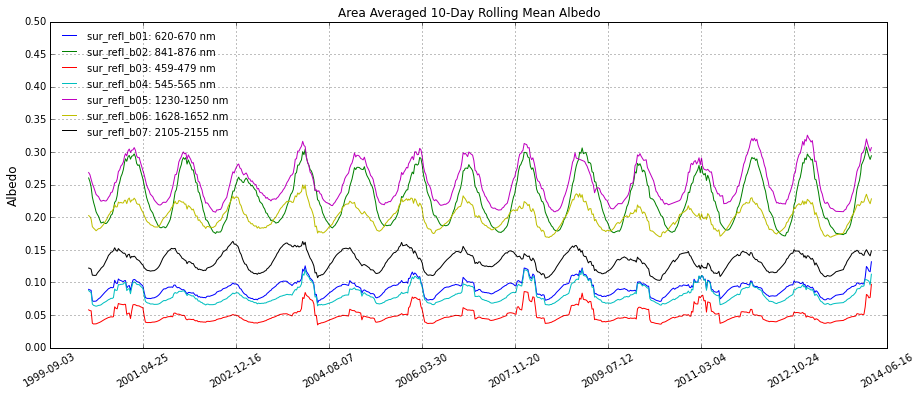

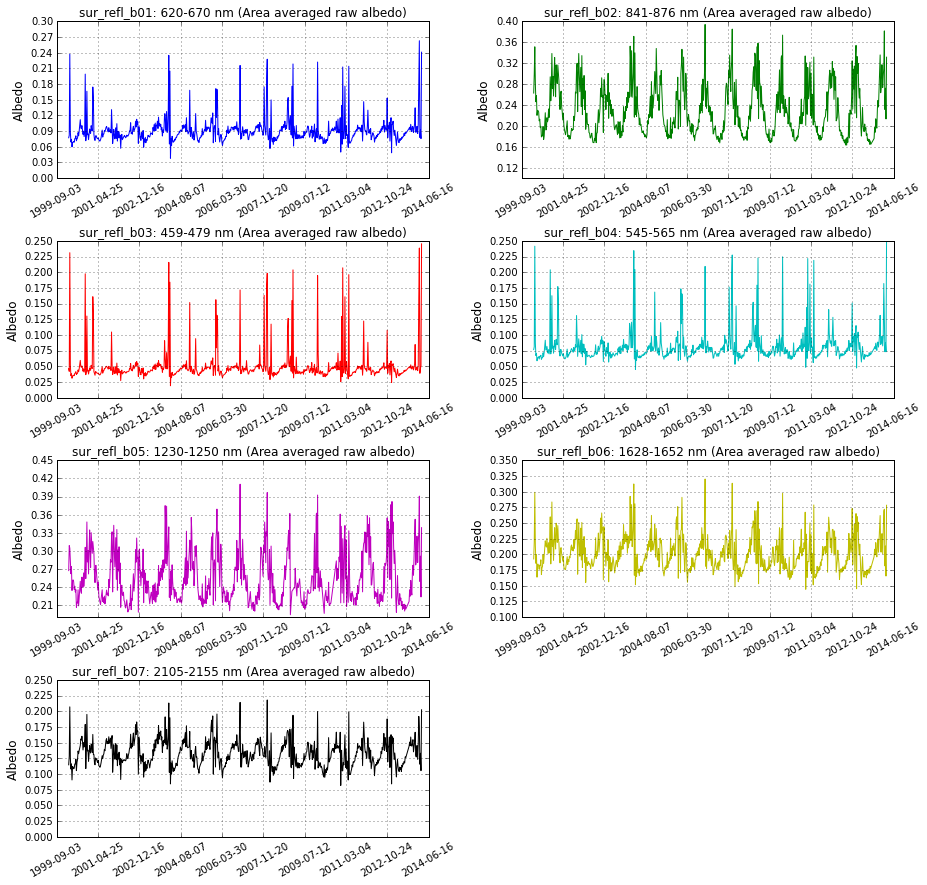

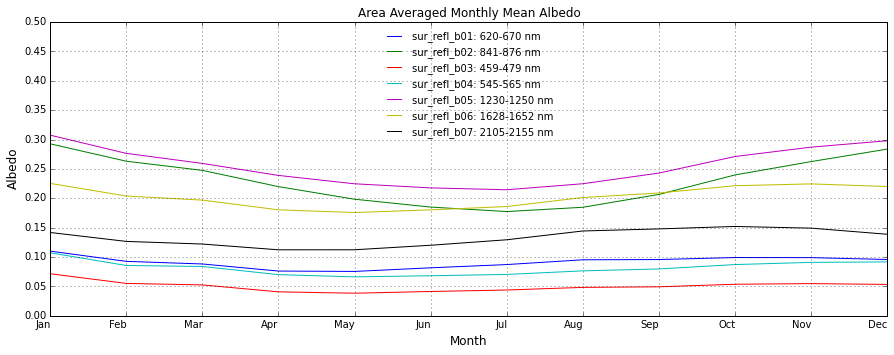

In [9]:
ascFile = './AlbedoData/SREFMOD09A1/MOD09A1.asc'
numberSamples = 13 * 13 # this particular data file we have so many samples on each row
RAdays = 10 #rolling average time period

rhoLimits=[[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]]
rhoLimits=[[0.,0.3],[0.1,0.4],[0.0,0.25],[0.0,0.25],[0.19,0.45],[0.1,0.35],[0.0,0.25]]

p = ryplot.Plotter(1,figsize=(15,6))
q = ryplot.Plotter(2,4,2,figsize=(15,15))
r = ryplot.Plotter(3,figsize=(15,6))

for (i,dataType) in enumerate(['sur_refl_b0{}'.format(i) for i in range(1,8)]):
#     print('Parameter: {}'.format(dataType))
    refl,dataCols = getRowsByType(ascFile, dataType, numberSamples,nrows=None, fileType='MOD9A1')
    
    #get the mean for all samples on one line then drop the individual columns
    refl['meanRefl'] =  refl.ix[:,dataCols[0]:dataCols[-1]].mean(axis=1)
    refl = refl.drop(dataCols,axis=1)
    refl = refl.drop('ModRDate',axis=1)
    
    #filter by limits, only rows within limits are kept
    reflfi = refl[refl['meanRefl'] >= rhoLimits[i][0] ]
    reflf = reflfi[reflfi['meanRefl'] <= rhoLimits[i][1] ]
    
    reflf['rollingMeanRelf'] = pd.stats.moments.rolling_mean(reflf['meanRefl'],RAdays)

    date = np.asarray(reflf['ModAcqdate'])

    q.plot(i+1,date,np.asarray(reflf['meanRefl']),ptitle='{}: {} (Area averaged raw albedo)'.format(dataType,dicBandsnm[dataType]),
        xlabel='',ylabel='Albedo',xIsDate=True, xtickRotation=30,
        pltaxis=[date[0],date[-1], rhoLimits[i][0], rhoLimits[i][1]])

    p.plot(1,date,np.asarray(reflf['rollingMeanRelf']),ptitle='Area Averaged {}-Day Rolling Mean Albedo'.format(RAdays),
        xlabel='',ylabel='Albedo',xIsDate=True, pltaxis=[date[0],date[-1],0,0.5],
        label=['{}: {}'.format(dataType,dicBandsnm[dataType])], xtickRotation=30)
    
    # calculate the average reflectance averaged over a month time period
    refld = reflf.set_index('ModAcqdate')
    monthMeans = refld.groupby(lambda x: (x.month)).mean() 
    
    if i == 0:
        monthlyRelf = np.asarray(monthMeans['meanRefl']).reshape(-1,1)
    else:
        monthlyRelf = np.hstack((monthlyRelf,np.asarray(monthMeans['meanRefl']).reshape(-1,1)))

    r.plot(1,np.asarray(np.arange(1,13)),np.asarray(monthMeans['meanRefl']),ptitle='Area Averaged Monthly Mean Albedo',
        xlabel='Month',ylabel='Albedo',xIsDate=False, pltaxis=[1,12,0,0.5], 
        xtickRotation=0, xTicks=dicMonths, label=['{}: {}'.format(dataType,dicBandsnm[dataType])])
   


In [10]:
# #save the results
np.savetxt('MOD09A1-{}-monthly-reflectance.dat'.format(testsite),monthlyRelf,fmt='%10.5f')

#display in tabular format
#make data as index and spectral band as column headings
# index = pd.date_range('1/1/2014', periods=12, freq='M')
wavelengths = [ dicBandCentres['sur_refl_b0{}'.format(i)] for i in range(1,8) ]
months = [ dicMonths[i] for i in range(1,13) ]
monthlyMeanR = pd.DataFrame(monthlyRelf, index=months, columns=wavelengths)
monthlyMeanR.sort_index(axis=1,inplace=True)
monthlyMeanR

,0.469,0.555,0.645,0.8585,1.24,1.64,2.13
Jan,0.071576,0.107216,0.110072,0.292715,0.307477,0.225393,0.141793
Feb,0.055117,0.085638,0.092661,0.263125,0.276470,0.203884,0.126631
Mar,0.052576,0.083949,0.088214,0.247531,0.259371,0.196921,0.122140
Apr,0.040789,0.070048,0.076151,0.219863,0.238926,0.180371,0.112324
May,0.038446,0.066267,0.075521,0.198431,0.224679,0.175773,0.112394
Jun,0.041393,0.068181,0.081682,0.185058,0.217713,0.180331,0.120079
Jul,0.043914,0.070399,0.087214,0.177454,0.214542,0.185999,0.129415
Aug,0.048372,0.076490,0.095341,0.184719,0.224789,0.201291,0.144370
Sep,0.049341,0.079758,0.095749,0.206593,0.242934,0.208995,0.147925
Oct,0.053705,0.087212,0.099168,0.239746,0.271130,0.221422,0.152064


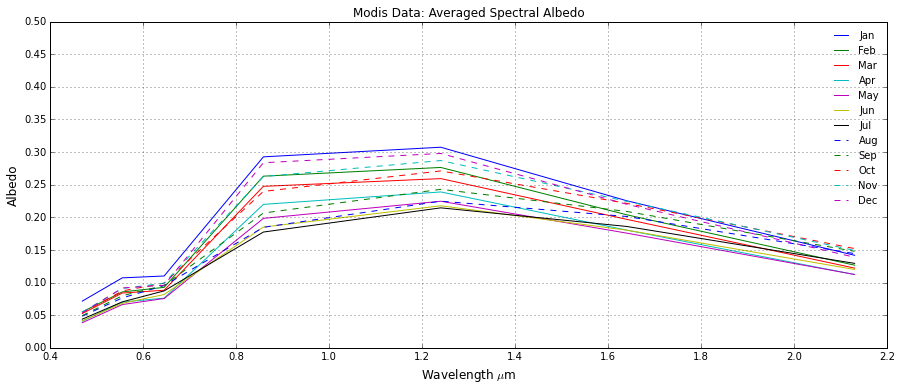

In [11]:
s = ryplot.Plotter(4,figsize=(15,6))
for month in months:
    s.plot(1,np.asarray(monthlyMeanR.columns.values),np.asarray(monthlyMeanR.ix[month][:]),
        ptitle='Modis Data: Averaged Spectral Albedo',
        xlabel='Wavelength $\mu$m',ylabel='Albedo',xIsDate=False, pltaxis=[0.4,2.2,0.,0.5], 
         label=['{}'.format(month)])

##Extract Infrared Reflectance from MODIS MOD11A2 Data


Read and process the data by taking the mean of all the data values and adding this to the data frame with column heading 'meanEmis'.

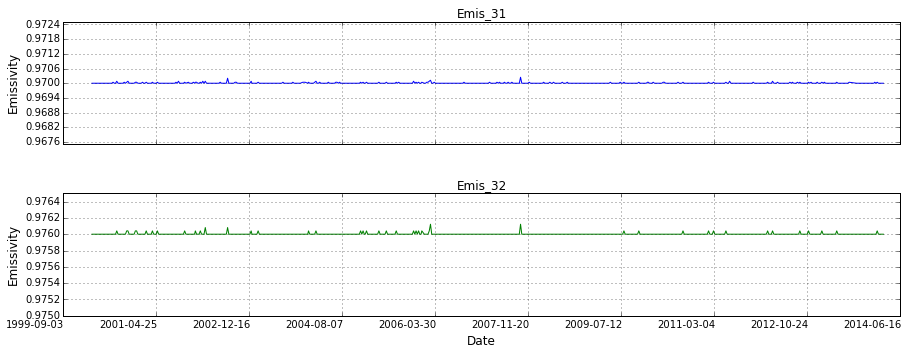

In [12]:
ascFile = './AlbedoData/LSTMOD11A2/MOD11A2.asc'
numberSamples = 7 * 7 # this particular data file we have so many samples on each row
RAdays = 10 #rolling average time period

emisLimits=[[0.9675,0.9725], [0.975,0.9765],]
# emisLimits=[[0.9,1],[0.9,1]]

p = ryplot.Plotter(1,2,1,figsize=(15,6))

albedoLWIR = {}
for (i,dataType) in enumerate(['Emis_31','Emis_32']):
#     print('Parameter: {}'.format(dataType))
    emis,dataCols = getRowsByType(ascFile, dataType, numberSamples,nrows=None, fileType='MOD11A2')
    #get the mean for all samples on one line
    emis['meanEmis'] =  emis.ix[:,dataCols[0]:dataCols[-1]].mean(axis=1)
    emis = emis.drop(dataCols,axis=1)
    emis = emis.drop('ModRDate',axis=1)
   
    #filter by limits, only rows within limits are kept
    emisfi = emis[emis['meanEmis'] > emisLimits[i][0] ]
    emisf = emisfi[emisfi['meanEmis'] < emisLimits[i][1] ]

#     print(emisf['meanEmis'].describe())
    date = np.asarray(emisf['ModAcqdate'])
    p.plot(i+1,date,np.asarray(emisf['meanEmis']),ptitle=dataType,
        xlabel='Date',ylabel='Emissivity',xIsDate=True, 
        pltaxis=[date[0],date[-1],emisLimits[i][0], emisLimits[i][1]])
    albedoLWIR[dataType] = 1.0 - emisf['meanEmis'].mean()


For completeness, we now also process the temperature values.

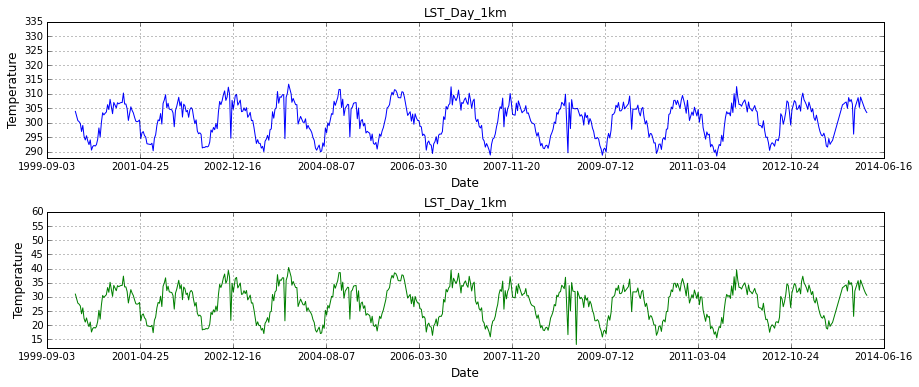

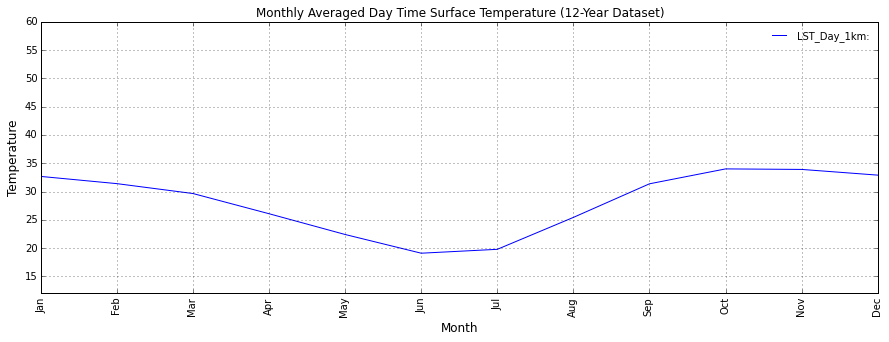

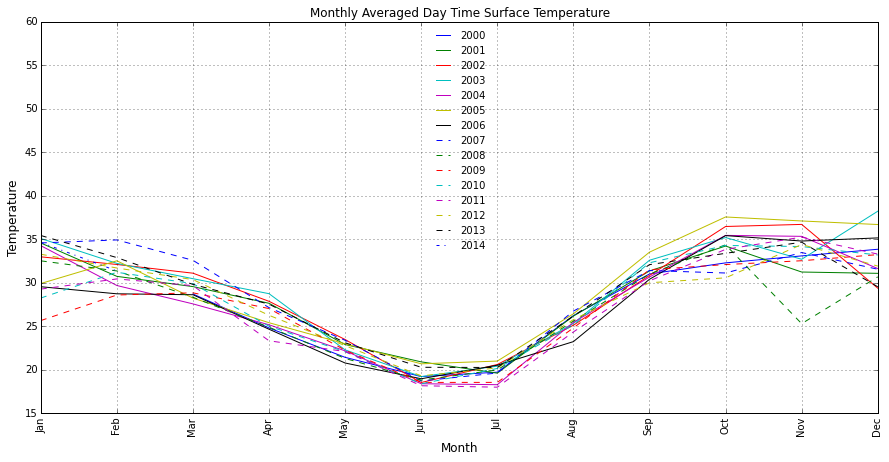

In [13]:
tempLimits=[[288, 335],[12, 60]]

p = ryplot.Plotter(2,2,1,figsize=(15,6))
r = ryplot.Plotter(3,figsize=(15,5))
t = ryplot.Plotter(4,1,1,figsize=(15,8))

deltaT = [0, 273 ]
for (i,dataType) in enumerate(['LST_Day_1km', 'LST_Day_1km']):
#     print('Parameter: {}'.format(dataType))
    temp,dataCols = getRowsByType(ascFile, dataType, numberSamples, nrows=None, fileType='MOD11A2')
    #get the mean for all samples on one line
    temp['meanTemp'] =  temp.ix[:,dataCols[0]:dataCols[-1]].mean(axis=1) - deltaT[i]
    temp = temp.drop(dataCols,axis=1)
    temp = temp.drop('ModRDate',axis=1)
   
    #filter by limits, only rows within limits are kept
    tempfi = temp[temp['meanTemp'] > tempLimits[i][0] ]
    tempf  = tempfi[tempfi['meanTemp'] < tempLimits[i][1] ]

    p.plot(i+1,np.asarray(tempf['ModAcqdate']),np.asarray(tempf['meanTemp']),ptitle=dataType,xlabel='Date',
           ylabel='Temperature',xIsDate=True, pltaxis=[date[0],date[-1],tempLimits[i][0], tempLimits[i][1]])
    
    if i == 1:
        # calculate the average reflectance averaged over a month time period, over all years
        tempd = tempf.set_index('ModAcqdate')
        
        #get the mean per month, for each year separately
        yearMonthGroup = tempd['meanTemp'].groupby(lambda x: (x.year, x.month)) 
        yearMonthGroupMean = yearMonthGroup.mean()
        #you can access the data as follows: yearMonthGroupMean[(2003,1)]
        #now make a multiple index from the current tuple index
        yearMonthGroupMean.index = pd.MultiIndex.from_tuples(yearMonthGroupMean.index)  
        #you can now access the data as follows: yearMonthGroupMean[2003][1]
        dicYears =  defaultdict(int)
        for year,month in yearMonthGroupMean.index:
            dicYears[year] = 1
        for yearKey in dicYears:
            dicMonths2 =  defaultdict(int)
            for year,month in yearMonthGroupMean.index:
                if year == yearKey:
                    dicMonths2[month] = 1
            
            t.plot(1,np.asarray(dicMonths2.keys()),np.asarray(yearMonthGroupMean[yearKey]),
                   ptitle='Monthly Averaged Day Time Surface Temperature',
                xlabel='Month',ylabel='Temperature',xIsDate=False, pltaxis=[1,12,15, 60], 
                xtickRotation=90, xTicks=dicMonths, label=['{}'.format(yearKey)])
        
        monthMeans = tempd.groupby(lambda x: (x.month)).mean()  
        r.plot(1,np.asarray(np.arange(1,13)),np.asarray(monthMeans['meanTemp']),
               ptitle='Monthly Averaged Day Time Surface Temperature (12-Year Dataset)',
            xlabel='Month',ylabel='Temperature',xIsDate=False, pltaxis=[1,12,tempLimits[i][0], tempLimits[i][1]], 
            xtickRotation=90, xTicks=dicMonths, label=['{}: {}'.format(dataType,dicBandsum[dataType])])
        
        
        monthlyTemp = np.asarray(monthMeans['meanTemp']).reshape(-1,1)
  

In [14]:
#save the results
np.savetxt('MOD11A2-{}-monthly-temperature.dat'.format(testsite),monthlyTemp,fmt='%10.5f')

#display in tabular format
#make data as index and spectral band as column headings
# index = pd.date_range('1/1/2014', periods=12, freq='M')
columns = [ 'Surface Temperature $^\circ$C' ]
index = [ dicMonths[i] for i in range(1,13) ]
monthlyMeanT = pd.DataFrame(monthlyTemp, index=index, columns=columns)
monthlyMeanT

,Surface Temperature $^\circ$C
Jan,32.662904
Feb,31.389702
Mar,29.643427
Apr,26.075353
May,22.406829
Jun,19.103643
Jul,19.789469
Aug,25.425675
Sep,31.360262
Oct,33.990730


##Test Site Spectral Albedo

The albedo is constructed from three sources:  

1. The spectral albedo derived from Modis data in this document for wavelengths below 2.1 $\mu$m.
2. The two LWIR albedo values derived from Modis data above.
3. Values between 3 $\mu$m and 10 $\mu$m, <font color="red">manually entered estimates</font>, based on ASTER (see the end of this file) and Modtran emissivity data.

In [15]:
#add new columns for MWIR and LWIR data, fixed values
monthlyMeanR[3.0] = 0.03
monthlyMeanR[4.0] = 0.03
monthlyMeanR[5.0] = 0.03
monthlyMeanR[6.0] = 0.03
monthlyMeanR[7.5] = 0.03
monthlyMeanR[8] = 0.04
monthlyMeanR[9] = 0.05
monthlyMeanR[10] = 0.06
monthlyMeanR[11.03] = albedoLWIR['Emis_31']
monthlyMeanR[12.05] = albedoLWIR['Emis_32']
#reindex to get wavelength into rows
monthlyMeanR = monthlyMeanR.transpose()
monthlyMeanR

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0.4690,0.071576,0.055117,0.052576,0.040789,0.038446,0.041393,0.043914,0.048372,0.049341,0.053705,0.054801,0.053401
0.5550,0.107216,0.085638,0.083949,0.070048,0.066267,0.068181,0.070399,0.076490,0.079758,0.087212,0.090946,0.091701
0.6450,0.110072,0.092661,0.088214,0.076151,0.075521,0.081682,0.087214,0.095341,0.095749,0.099168,0.099002,0.095842
0.8585,0.292715,0.263125,0.247531,0.219863,0.198431,0.185058,0.177454,0.184719,0.206593,0.239746,0.262463,0.283697
1.2400,0.307477,0.276470,0.259371,0.238926,0.224679,0.217713,0.214542,0.224789,0.242934,0.271130,0.287061,0.297942
1.6400,0.225393,0.203884,0.196921,0.180371,0.175773,0.180331,0.185999,0.201291,0.208995,0.221422,0.224522,0.220015
2.1300,0.141793,0.126631,0.122140,0.112324,0.112394,0.120079,0.129415,0.144370,0.147925,0.152064,0.149207,0.138788
3.0000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
4.0000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
5.0000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000


Write the albedo for each month of the year to disk file.

In [16]:
#now write this out to file, a new file for every month
for i,month in enumerate(months):
    monthlyMeanR.to_csv('./AlbedoData/{}Albedo-{}.dat'.format(testsite,month),sep=' ', 
                       header=False, columns=[month])
#save data for full year in one file, first col is the wavelength, then twelve months' data 
annualData = np.hstack((np.asarray(monthlyMeanR.index).reshape(-1,1), monthlyMeanR))
# annualData = monthlyMeanR
np.savetxt('./AlbedoData/{}Albedo-Annual.dat'.format(testsite),annualData)

Plot the test site albedo values from the text files just written, for all the months of the year.

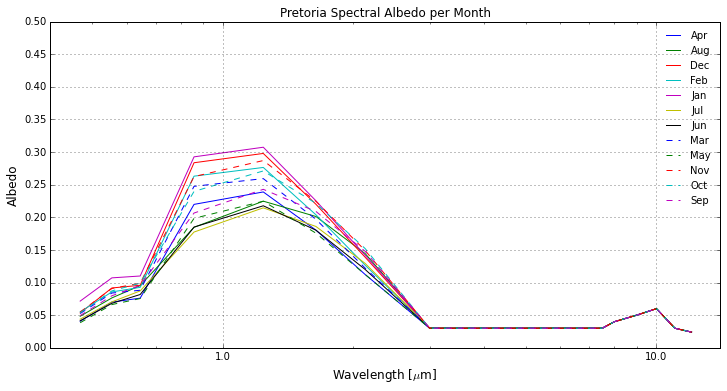

In [17]:
paths = ryfiles.listFiles('./AlbedoData',patterns='{}Albedo*.dat'.format(testsite))

p = ryplot.Plotter(1,figsize=(12,6))
for path in paths:
    if 'Annual' not in path:
        albedo = np.loadtxt(path,comments='%').T
        idx = path.rfind('/')
        label = (path[(idx+1):])[:-4].split('-')[1]
        p.semilogX(1,albedo[0],albedo[1],ptitle='{} Spectral Albedo per Month'.format(testsite),
        xlabel='Wavelength [$\mu$m]',ylabel='Albedo', pltaxis=[0.4, 14, 0, 0.5], label=[label])

##Modtran5 spectral albedo library

The Modtran spectral albedo values are obtained from the Modtran5 file `SPEC_ALB.DAT`.  
Compare the Modtran albedo values with the test site albedo for one month only (otherwise it clutters the graph). Note the following:  

1. The Modtran values tend to be quite high compared to the test site albedo, 
   but agrees to some extent with the ASTER data. One can therefore conclude that the Modtran  data is probably derived from reflectance information rather than albedo information.
2. It appears that the sandy surface has peaks in the medium and long-wave infrared bands  (ASTER and Modtran data). These peaks are not present in vegetation terrain.
3. The spectral shape of the test site albedo follows the general trend of the Modtran values.
4. For infrared applications the albedo at longer wavelengths is just as 
   important than the albedo at shorter wavelengths, because the surface radiates background
   radiance in the longer wavelength bands.
5. The  albedo in the 1-3 $\mu$m band is  generally higher than at other wavelengths. This band is of relevance to the colour ratio in two-colour missiles, and hence will affect aircraft signatures in the NIR/SWIR band.

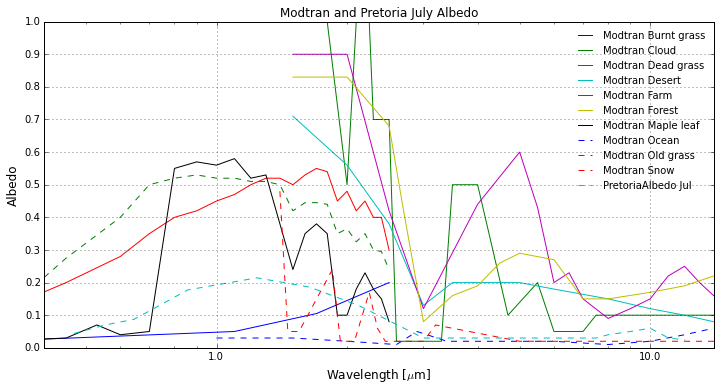

In [18]:
paths = ryfiles.listFiles('./AlbedoData/otherInfo', patterns='Modtran*.dat', recurse=0)
paths.append('./AlbedoData/{}Albedo-Jul.dat'.format(testsite))

p = ryplot.Plotter(1,figsize=(12,6))
for path in paths:
#     print('Loading path {}'.format(path))
    albedo = np.loadtxt(path,comments='%').T
    # print(albedo[0])
    idx = path.rfind('/')
    label = (path[(idx+1):])[:-4]
    label = label.replace('AlbedoData\\otherInfo\\','')
    label = label.replace('-',' ')	
    p.semilogX(1,albedo[0],albedo[1],ptitle='Modtran and {} July Albedo'.format(testsite),
        xlabel='Wavelength [$\mu$m]',ylabel='Albedo',
        pltaxis=[0.4, 14, 0, 1], label=[label])

##ASTER spectral library

The ASTER spectral library <http://speclib.jpl.nasa.gov/> contains a limited set of 
spectral data for natural surfaces (it mostly contains spectral data on processed minerals). 
In this library the natural surfaces (plants, soils, etc.) tend to have quite high reflectance in the 
shorter wavelength bands. Sample reflectance from the ASTER web site are shown below.

There is a striking difference between the ASTER spectral curves and the spectral albedo calculated
here. This ASTER sample and the others tend to have reflectance values almost twice as large as the 
Modis values above.  

One possible explanation for this difference may be the fact that the ASTER data is normally sampled in laboratory conditions, with a flat sample in some processed form, with controlled illumination and measurement geometry.  It may well be that tree leaves have such high surface reflection, but when measured in the albedo context a number of other factors should be considered:  

1. Field measurements seldom measure a flat surface at normal incidence.
2. Field measurements are greatly affected by the material BRDF and relative geometry 
   between the sun, the sample and the measurement instrument.
3. Leave clusters in the canopy of trees, shrubs and grass form cavities 
   (in contrast with a simple single surface sample).  The light in these cavities may reflect
   a number of times before leaving the canopy. The effective reflectance of this canopy is
   therefore $\rho^n$ after $n$ reflections.
4. Vegetation canopies tend to be darker than simple single samples because of shading effects
   in the canopy. Careful (horizontal) observation of trees in a distance will reveal a surprisingly high 
   shadow content in the tree canopies - trees tend to be much darker than the colour of their leaves.
   It is true that the horizontal viewing geometry is very different in this respect to the vertical 
   viewing geometry used by satellites, but the same principle applies.
5. It is expected that for samples with less/no canopy effect (e.g., desert sand) there should be 
   closer correspondence between sample reflectance and sample albedo.
   
This very brief analysis seems to show that albedo should be lower than the surface reflectance of a sample.

See also: Coakley, J.A., Jr., 2002: Reflectance and albedo, surface. Encyclopedia of the Atmosphere. J.R. Holton and J.A. Curry, Eds. Academic Press. 1914-1923. <http://curry.eas.gatech.edu/Courses/6140/ency/Chapter9/Ency_Atmos/Reflectance_Albedo_Surface.pdf>

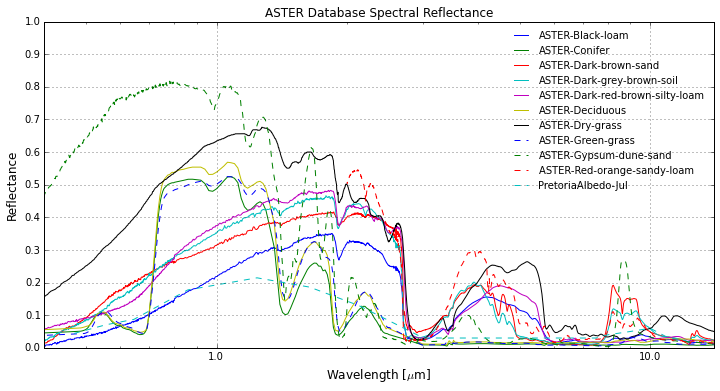

In [19]:
paths = ryfiles.listFiles('./AlbedoData/otherInfo', patterns='ASTER*.dat', recurse=0)
paths.append('./AlbedoData/{}Albedo-Jul.dat'.format(testsite))

p = ryplot.Plotter(1,figsize=(12,6))
for path in paths:
    reflectance = np.loadtxt(path,comments='%').T
    idx = path.rfind('/')
    label = (path[(idx+1):])[:-4]
    label = label.replace('AlbedoData\\otherInfo\\','')
    if 'ASTER' in label:
        reflectVal = reflectance[1]/100.
    else:
        reflectVal = reflectance[1]
        
    p.semilogX(1,reflectance[0],reflectVal,xlabel='Wavelength [$\mu$m]',ylabel='Reflectance',
        ptitle='ASTER Database Spectral Reflectance', pltaxis=[0.4, 14, 0, 1.0],label=[label])


## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

In [20]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pyradi, pandas

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.0.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pyradi 0.1.55
pandas 0.15.2
Sat Apr 04 21:54:09 2015 South Africa Standard Time